<center>
<img src="logo.png" height="900"> 
</center>


# Контрольная работа :)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [2]:
df = pd.read_csv('cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

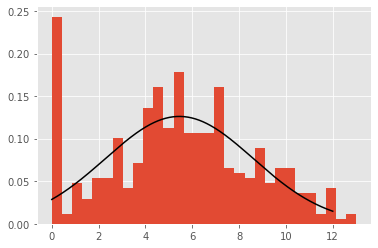

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df.k1.dropna().values

x_mean = x.mean()
x_std = x.std(ddof=1)
plt.hist(x, bins=30, density=True);

xs = np.linspace(0, 12, 300)
ys = stats.norm(loc=x_mean, scale=x_std).pdf(xs)
plt.plot(xs, ys, color="black");

# your code here


In [7]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

# похожие тесты на другие части задания скрыты от вас


По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

pvalue = stats.kstest(df.k1, 'norm', args=(x_mean, x_std))[1]
K = stats.kstest(df.k1, 'norm', args=(x_mean, x_std))[0]

print("Значение статистики Колмогорова {:.5}, р-значение {:.5}".format(K, pvalue))
# your code here


Значение статистики Колмогорова 0.051247, р-значение 0.25001


__Так р-значение > 0.05, гипотеза о нормальности данных не отвергается__

In [9]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
n = x.size
left = stats.t.interval(1-alpha, df=(n-1), loc=x_mean, scale=x_std/np.sqrt(n))[0]
right = stats.t.interval(1-alpha, df=(n-1), loc=x_mean, scale=x_std/np.sqrt(n))[1]
delta = right-left

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, delta))

# your code here


Доверительный интервал [5.132; 5.763] ширины 0.6307


In [13]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

# похожие тесты на другие части задания скрыты от вас


__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

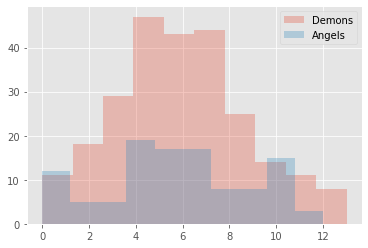

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df[df.fraud == 0.0].k1.dropna().values
demons = df[df.fraud > 0.0].k1.dropna().values

plt.hist(demons,alpha=0.3, label='Demons');
plt.hist(angels,alpha=0.3, label='Angels');
plt.legend();

# your code here


In [15]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# похожие тесты на другие части задания скрыты от вас


__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

diff = angels.mean() - demons.mean()
nx, ny = angels.size, demons.size
diff_sd = np.sqrt(angels.var(ddof=1)/nx + demons.var(ddof=1)/ny)
u = (angels.var(ddof=1) / nx + demons.var(ddof=1) / ny) ** 2
d = (angels.var(ddof=1)**2) / (nx**2 * (nx - 1)) + (demons.var(ddof=1)**2)/ (ny**2* (ny - 1))

# число степеней свободы в распределении Стьюдента  
nu =  u/d
# левая граница интервала
left = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)[0]
# правая граница интервала
right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)[1]
# ширина интервала
delta = right - left

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, delta))

# your code here


Доверительный интервал [-0.8046; 0.547] ширины 1.352


In [17]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__Ноль входит в данный интервал. Следовательно, гипотеза о равенстве средних не отвергается.__


__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05

n, m = angels.size - 1, demons.size - 1
sn, sm = angels.var(ddof=1), demons.var(ddof=1)

left =  sm / sn * stats.f(n, m).ppf(alpha/2)     # левая граница интервала
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)     # правая граница интервала
delta = right - left     # ширина интервала

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))

# your code here


Доверительный интервал [0.61204; 1.1624] ширины 0.55034


In [19]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__Единица входит в доверительный интервал. Следовательно, гипотеза о равенстве дисперсий не отвергается.__

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

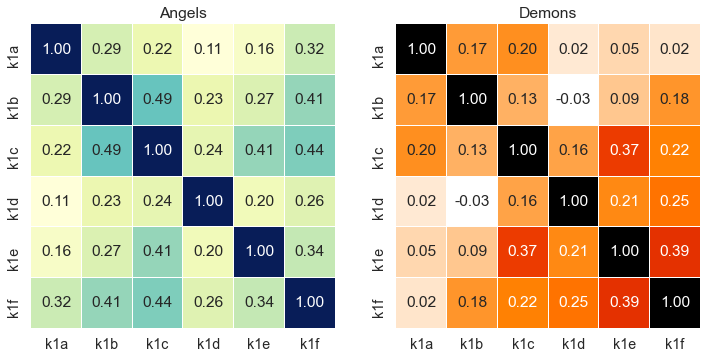

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

sns.set(font_scale=1.3)

fig, ax =plt.subplots(1,2,figsize=(12, 12))

sns.heatmap(df[df.fraud == 0.0][tasks].fillna(0).corr(method='pearson'), square=True,
            annot=True, fmt=".2f", linewidths=0.1, cmap="YlGnBu",cbar=False,ax=ax[0]);
ax[0].set_title('Angels');
sns.heatmap(df[df.fraud > 0.0][tasks].fillna(0).corr(method='pearson'), square=True,
           annot=True, fmt=".2f", linewidths=0.1, cmap="gist_heat_r", cbar=False, ax=ax[1]);
ax[1].set_title('Demons');

# your code here


Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

names_angels = ("k1b", "k1c")
names_demons = ("k1e", "k1f") 

# your code here


In [160]:
# проверка вашего ответа скрыта от вас

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels2=df[(df.fraud == 0.0) & (df.k3 >0)].k3.values # Ангелы, которые решили писать третью контрольную
demons2=df[(df.fraud > 0.0) & (df.k3 >0)].k3.values  # Демоны, которые решили писать третью контрольную

p_angels=angels2.size/angels.size # доля Ангелов, которые решили писать третью контрольную
p_demons=demons2.size/demons.size # доля Демонов, которые решили писать третью контрольную

diff = p_angels-p_demons 
diff_sd = np.sqrt(p_angels*(1-p_angels)/angels.size+p_demons*(1-p_demons)/demons.size)

alpha = 0.05
z_crit = stats.norm().ppf(1 - alpha/2)

left =  diff - z_crit*diff_sd     # левая граница интервала
right = diff + z_crit*diff_sd     # правая граница интервала
delta = right - left              # ширина интервала

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, delta))

# your code here


Доверительный интервал [-0.1885; 0.03341] ширины 0.2219


In [23]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__Ноль входит в данный интервал. Следовательно, гипотеза о равенстве долей Ангелов и Демонов, которые решили писать третью контрольную, не отвергается.__

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за первую и вторую контрольные. Пропуски в данных заполните нулями. 

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x=(df.k2.fillna(0)-df.k1.fillna(0)).values

alpha = 0.05
# левая граница интервала
left = x.mean() - stats.t(x.size - 1).ppf(1 - alpha/2)*np.sqrt(x.var(ddof=1)/x.size)
# правая граница интервала
right = x.mean() + stats.t(x.size - 1).ppf(1 - alpha/2)*np.sqrt(x.var(ddof=1)/x.size)
# ширина интервала
delta = right - left

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, delta))

# your code here


Доверительный интервал [-1.456; -0.7072] ширины 0.7491


In [25]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__Ноль не входит в данный интервал. Следовательно, первую контрольную студенты написали в среднем, лучше чем вторую.__

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.